In [15]:
# Import Packages
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import re, string, unicodedata
import nltk

from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [16]:
df = pd.read_csv('/content/drive/MyDrive/zomato.csv')

In [17]:
print("Dataset Size:", df.shape)

Dataset Size: (51717, 17)


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
df.head(10)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


In [20]:
#checking missing values
print(df.isnull().sum())

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64


In [21]:
# drop records
df = df[df['rate'].notnull()]

In [22]:
# Convert the text data to lowercase
df['name'] = df['name'].str.lower()
df['location'] = df['location'].str.lower()
df['rest_type'] = df['rest_type'].str.lower()
df['dish_liked'] = df['dish_liked'].str.lower()
df['cuisines'] = df['cuisines'].str.lower()
df['menu_item'] = df['menu_item'].str.lower()
df['listed_in(city)'] = df['listed_in(city)'].str.lower()

In [23]:
# Remove special characters and punctuation
df['rest_type'] = df['rest_type'].str.replace("'|\[|\]",'')#(",|'|\[|\]",'')    # this code removes replace comma, square bracket and quotes with space
df['menu_item'] = df['menu_item'].str.replace("'|\[|\]",'')#(",|'|\[|\]",'')
df['menu_item'] = df['menu_item'].str.replace(r'^\s*$','not specified')
df['dish_liked'] = df['dish_liked'].str.replace("'|\[|\]",'')#(",|'|\[|\]",'')
df['cuisines'] = df['cuisines'].str.replace("'|\[|\]",'')#(",|'|\[|\]",'')
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(",",'').astype(float)
df['rate'] = df['rate'].str.replace("\/5",'')

<ipython-input-23-565de689f7e7>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['rest_type'] = df['rest_type'].str.replace("'|\[|\]",'')#(",|'|\[|\]",'')    # this code removes replace comma, square bracket and quotes with space
<ipython-input-23-565de689f7e7>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['menu_item'] = df['menu_item'].str.replace("'|\[|\]",'')#(",|'|\[|\]",'')
<ipython-input-23-565de689f7e7>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['menu_item'] = df['menu_item'].str.replace(r'^\s*$','not specified')
<ipython-input-23-565de689f7e7>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['dish_liked'] = df['dish_liked'].str.replace("'|\[|\]",'')#(",|'|\[|\]",'')
<ipython-input-23-565de689f7e7>:6: FutureWarning: The default value of regex will change from Tr

In [24]:
# Apply feature Engineering on reviews_list column and create some new columns
def rating_type(rating):
    """Assign category to each rating"""
    if rating>=3.5:
        return 'good'
    elif rating>=2.0:
        return 'average'
    else:
        return 'bad'

# Extract rating from reviews as a list
df['rating_list'] = df['reviews_list'].str.findall(r"(?:'Rated )(\d+\.\d)")

# Convert rating list to float from string
df['rating_list'] = df['rating_list'].apply(lambda x: list(map(float, x)))

# Assign category to each rating in the list
df['rating_list'] =df['rating_list'].apply(lambda x: list(map(rating_type, x)))

# Count each type of rating and form a dictionary for each record
df['rating_list'] = df['rating_list'].apply(lambda x: {b:x.count(b) for b in x})

# Split this dictionary to separate column and concatenate to the dataframe
df = pd.concat([df,df['rating_list'].apply(pd.Series)], axis = 1)

<ipython-input-24-6b08d97f8bbd>:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df = pd.concat([df,df['rating_list'].apply(pd.Series)], axis = 1)
<ipython-input-24-6b08d97f8bbd>:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df = pd.concat([df,df['rating_list'].apply(pd.Series)], axis = 1)
<ipython-input-24-6b08d97f8bbd>:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df = pd.concat([df,df['rating_list'].apply(pd.Series)], axis = 1)
<ipython-input-24-6b08d97f8bbd>:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df = p

In [25]:
# Let's do some calculation and find the percentage of good, average and bad reviews
# fill NaN with 0
str_cols = ['good','average','bad']
df[str_cols] = df[str_cols].fillna(0)

# Convert these three columns to int
df[str_cols] = df[str_cols].astype(int)

# Add these three columns and create a new column for total rating count
df['number_of_reviews']=df['average']+df['good']+df['bad']

# Convert to these rating count to percentage
df[str_cols] = df[str_cols].apply(lambda x: round(x/df['number_of_reviews']*100,2))

# Again fill NaN with 0
df[str_cols] = df[str_cols].fillna(0)

# Rename the column
df = df.rename({'average':'neutral_reviews_percentage', 'good':'positive_reviews_percentage', 'bad':'negative_reviews_percentage'},axis=1)

In [26]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [27]:
# Clean reviews_list column
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub(r'\[\[(?:[^\]|]*\|)?([^\]|]*)\]\]', '', text).strip('[]')

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text


# special_characters removal
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text


def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('UTF-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


def remove_punctuation_and_splchars(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_word = remove_special_characters(new_word, True)
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

stopword_list= stopwords.words('english')
stopword_list.remove('no')
stopword_list.append('rated')
stopword_list.append('ratedn')
stopword_list.append('specified')


def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopword_list:
            new_words.append(word)
    return new_words



def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation_and_splchars(words)
    words = remove_stopwords(words)
    return words

def lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas


In [28]:
def normalize_and_lemmaize(input):
    sample = denoise_text(input)
    sample = remove_special_characters(sample)
    words = nltk.word_tokenize(sample)
    words = normalize(words)
    words = lemmatize(words)

    return ' '.join(words)

In [29]:
df['cleaned_reviews'] = df['reviews_list'].map(lambda text: normalize_and_lemmaize(text))

<ipython-input-27-22c4621fb502>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [30]:
df.sample()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,...,reviews_list,menu_item,listed_in(type),listed_in(city),rating_list,positive_reviews_percentage,neutral_reviews_percentage,negative_reviews_percentage,number_of_reviews,cleaned_reviews
28703,https://www.zomato.com/bangalore/mcdonalds-kor...,"10, 4th C Cross, Behind HDFC Bank, 7th Block, ...",mcdonald's,Yes,No,3.8,295,+91 8928304180,koramangala 5th block,quick bites,...,"[('Rated 3.0', ""RATED\n This one is a pretty ...","new chicken maharaja mac, mcspicy chicken, mcs...",Dine-out,koramangala 4th block,"{'average': 1, 'good': 3}",75.0,25.0,0.0,4,one pretty big outlet mcdonalds locate end th ...


In [31]:
# mark NaN of rest_type as unspecified
df['rest_type'] = df['rest_type'].fillna('not specified')
df['dish_liked'] = df['dish_liked'].fillna('not specified')
df['phone'] = df['phone'].fillna('not specified')

# Drop records with missing values
df = df[df['approx_cost(for two people)'].notnull()]

In [32]:
# Copy the DataFrame
cleaned_df = df[df['rate'] != 'NEW'].copy()

# Replace non-numeric values with NaN
cleaned_df['rate'] = cleaned_df['rate'].apply(lambda x: float(x) if x.replace('.', '', 1).isnumeric() else None)

# Now, 'rate' column should contain NaN for non-numeric values


In [33]:
# Calculating new metric of popularity
max_votes = cleaned_df['votes'].max()

def weighted_rating(row):
    weighted_factor = row['votes']/max_votes
    return ((weighted_factor*row['rate']))

cleaned_df['popularity_score'] = cleaned_df.apply(weighted_rating,axis=1)

In [34]:
# Combine text from columns and normalize
cleaned_df['text'] = cleaned_df[['name','rest_type', 'dish_liked','menu_item' ]].agg(' '.join, axis=1)
cleaned_df['text'] = cleaned_df['text'].map(lambda text: normalize_and_lemmaize(text))
cleaned_df['text'] = cleaned_df[['text','cleaned_reviews']].agg(' '.join, axis=1)

<ipython-input-27-22c4621fb502>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


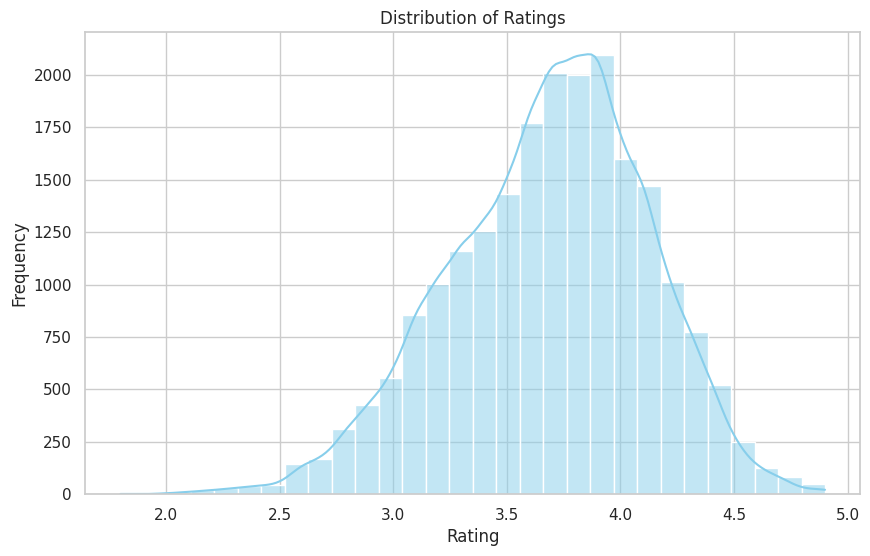

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['rate'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [43]:
# Check the number of unique restaurants
unique_restaurants = cleaned_df['name'].nunique()

# Display unique restaurants and their 'popularity_score'
unique_restaurants_with_scores = cleaned_df[['name', 'popularity_score']].drop_duplicates().nlargest(10, 'popularity_score')
print(unique_restaurants_with_scores)

                              name  popularity_score
3921   byg brewski brewing company          4.758228
18643                         toit          4.176164
27806                     truffles          4.103006
26549                     truffles          4.101889
8330                      truffles          4.091837
26488              the black pearl          2.923818
11497              the black pearl          2.910135
8268               the black pearl          2.907622
19115                  big pitcher          2.524519
17523                  big pitcher          2.518934


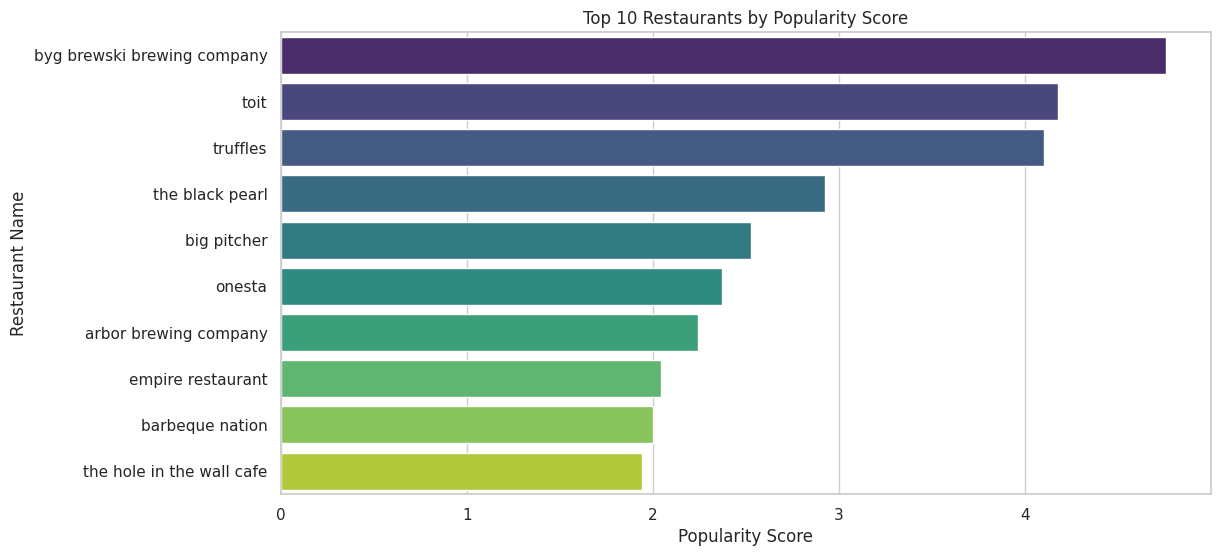

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Define the number of top restaurants to display
top_n = 10

# Check the number of unique restaurants
unique_restaurants = cleaned_df['name'].nunique()

# Adjust top_n if there are fewer unique restaurants
top_n = min(top_n, unique_restaurants)

# Select the top N unique restaurants based on 'popularity_score'
unique_top_restaurants = cleaned_df.groupby('name').agg({'popularity_score': 'max'}).nlargest(top_n, 'popularity_score').reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='popularity_score', y='name', data=unique_top_restaurants, palette='viridis')
plt.title(f'Top {top_n} Restaurants by Popularity Score')
plt.xlabel('Popularity Score')
plt.ylabel('Restaurant Name')
plt.show()

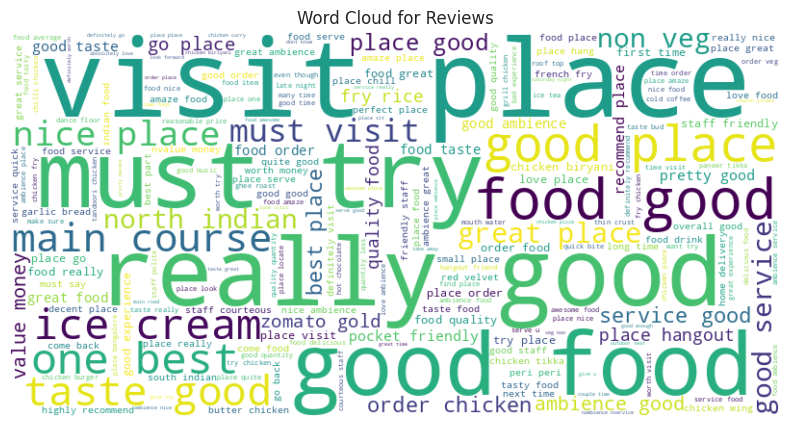

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate cleaned reviews into a single string
all_reviews_text = ' '.join(cleaned_df['cleaned_reviews'])

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Reviews')
plt.show()

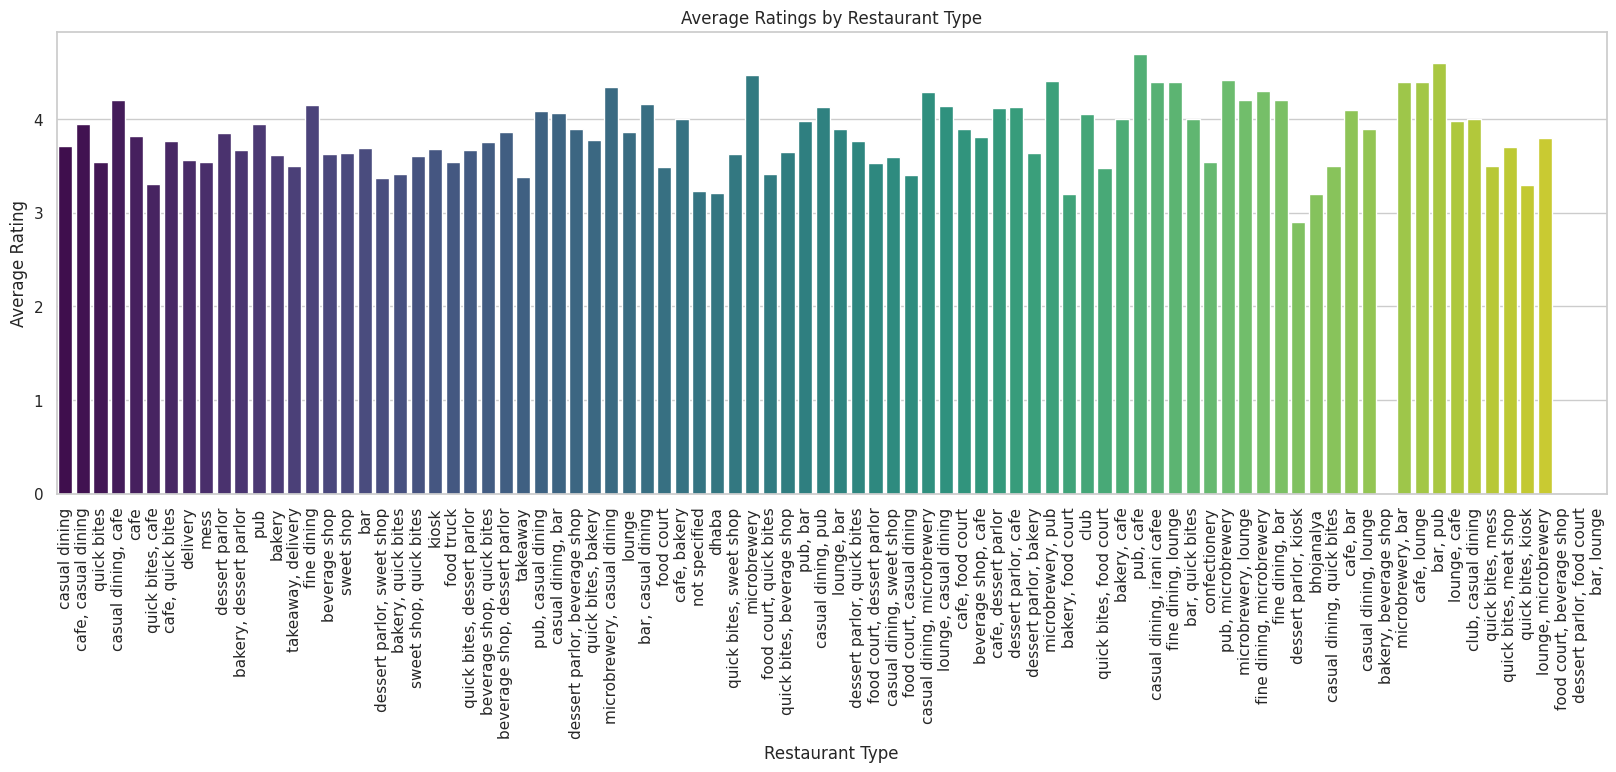

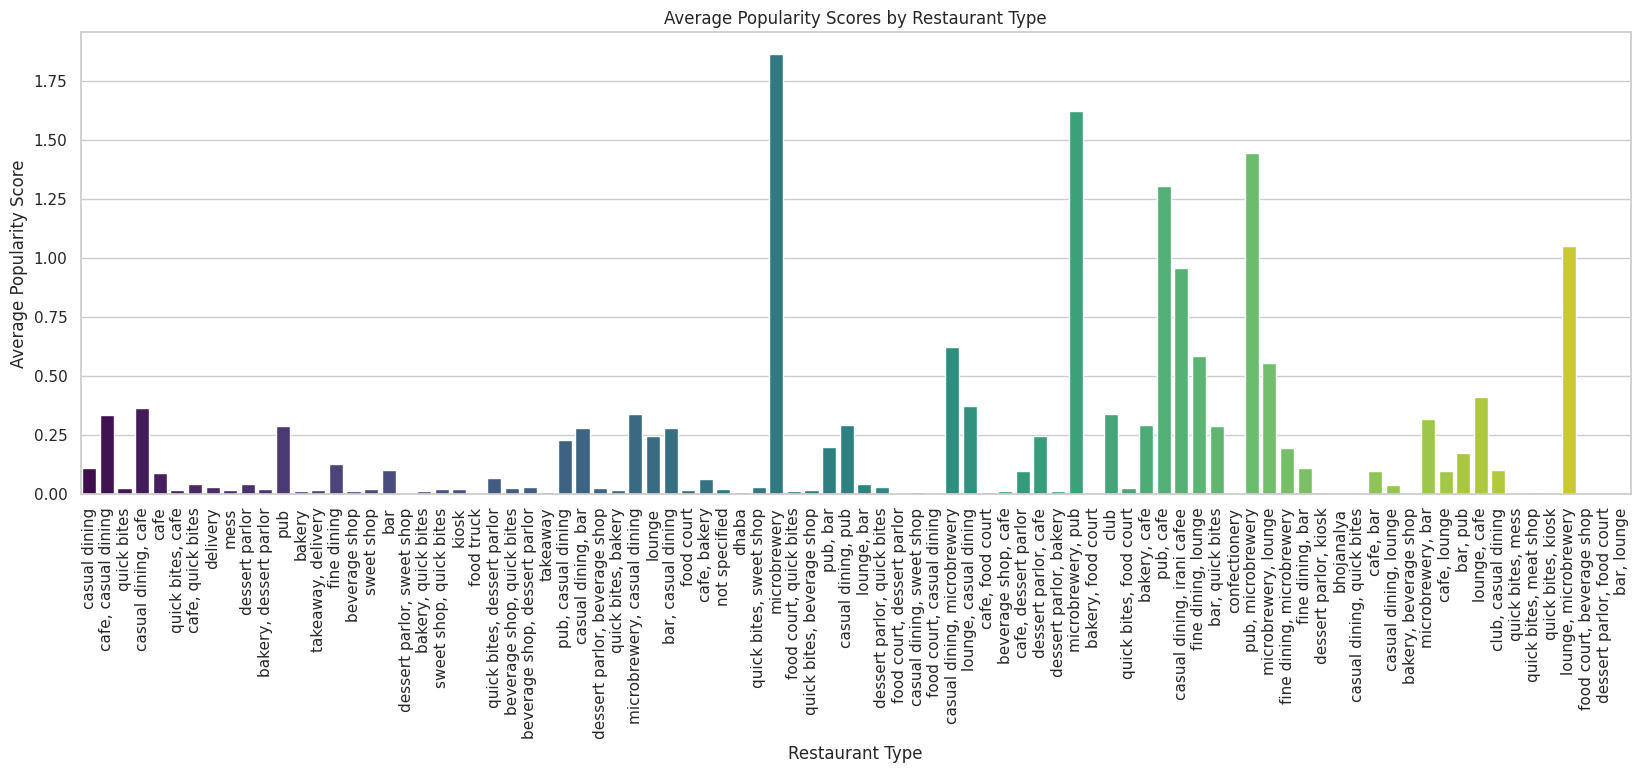

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Bar plot for average ratings based on restaurant types
plt.figure(figsize=(20, 6))
sns.barplot(x='rest_type', y='rate', data=cleaned_df, errorbar=None, palette='viridis')
plt.title('Average Ratings by Restaurant Type')
plt.ylabel('Average Rating')
plt.xlabel('Restaurant Type')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Bar plot for average popularity scores based on restaurant types
plt.figure(figsize=(20, 6))
sns.barplot(x='rest_type', y='popularity_score', data=cleaned_df, errorbar=None, palette='viridis')
plt.title('Average Popularity Scores by Restaurant Type')
plt.ylabel('Average Popularity Score')
plt.xlabel('Restaurant Type')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [59]:
'''
Unique Locations

S.No:       Location
1:       Banashankari
2:       Basavanagudi
3:       Mysore Road
4:       Jayanagar
5:       Kumaraswamy Layout
6:       Rajarajeshwari Nagar
7:       Vijay Nagar
8:       Uttarahalli
9:       JP Nagar
10:       Nagarbhavi
11:       Bannerghatta Road
12:       BTM
13:       Kanakapura Road
14:       Bommanahalli
15:       CV Raman Nagar
16:       Electronic City
17:       HSR
18:       Marathahalli
19:       Sarjapur Road
20:       Wilson Garden
21:       Shanti Nagar
22:       Koramangala 5th Block
23:       Koramangala 8th Block
24:       Richmond Road
25:       Koramangala 7th Block
26:       Jalahalli
27:       Koramangala 4th Block
28:       Bellandur
29:       Whitefield
30:       East Bangalore
31:       Old Airport Road
32:       Indiranagar
33:       Koramangala 1st Block
34:       Frazer Town
35:       RT Nagar
36:       MG Road
37:       Brigade Road
38:       Lavelle Road
39:       Church Street
40:       Ulsoor
41:       Residency Road
42:       Shivajinagar
43:       Infantry Road
44:       St. Marks Road
45:       Cunningham Road
46:       Race Course Road
47:       Commercial Street
48:       Vasanth Nagar
49:       HBR Layout
50:       Domlur
52:       Jeevan Bhima Nagar
53:       Old Madras Road
54:       Malleshwaram
55:       Seshadripuram
56:       Kammanahalli
57:       Koramangala 6th Block
58:       Majestic
59:       Langford Town
60:       Central Bangalore
61:       Sanjay Nagar
62:       Brookefield
63:       ITPL Main Road,Whitefield
64:       Varthur Main Road, Whitefield
65:       KR Puram
66:       Koramangala 2nd Block
67:       Koramangala 3rd Block
68:       Koramangala
69:       Hosur Road
70:       Rajajinagar
71:       Banaswadi
72:       North Bangalore
73:       Nagawara
74:       Hennur
75:       Kalyan Nagar
78:       New BEL Road
79:       Jakkur
80:       Rammurthy Nagar
81:       Thippasandra
82:       Kaggadasapura
83:       Hebbal
84:       Kengeri
85:       Sankey Road
86:       Sadashiv Nagar
87:       Basaveshwara Nagar
88:       Yeshwantpur
89:       West Bangalore
90:       Magadi Road
91:       Yelahanka
92:       Sahakara Nagar
93:       Peenya'''

'S.No:       Location\n1:       Banashankari\n2:       Basavanagudi\n3:       Mysore Road\n4:       Jayanagar\n5:       Kumaraswamy Layout\n6:       Rajarajeshwari Nagar\n7:       Vijay Nagar\n8:       Uttarahalli\n9:       JP Nagar\n10:       Nagarbhavi\n11:       Bannerghatta Road\n12:       BTM\n13:       Kanakapura Road\n14:       Bommanahalli\n15:       CV Raman Nagar\n16:       Electronic City\n17:       HSR\n18:       Marathahalli\n19:       Sarjapur Road\n20:       Wilson Garden\n21:       Shanti Nagar\n22:       Koramangala 5th Block\n23:       Koramangala 8th Block\n24:       Richmond Road\n25:       Koramangala 7th Block\n26:       Jalahalli\n27:       Koramangala 4th Block\n28:       Bellandur\n29:       Whitefield\n30:       East Bangalore\n31:       Old Airport Road\n32:       Indiranagar\n33:       Koramangala 1st Block\n34:       Frazer Town\n35:       RT Nagar\n36:       MG Road\n37:       Brigade Road\n38:       Lavelle Road\n39:       Church Street\n40:       Ulsoor\

In [64]:
# Take use input
user_text = input("Type your prefernces : ")
location = input("Location you want to be served : ").lower()
cuisine_type = input("Cuisines Type : ").lower()

Type your prefernces : good
Location you want to be served : Basavanagudi
Cuisines Type : chinese


In [65]:
# Function for restaurant recommendation based on user preference using cosine similarity
def get_recommendation(user_text,location,cuisine_type,recommendation_count):
    user_text = [normalize_and_lemmaize(user_text)]

    filtered_df = cleaned_df.copy()

    # Filter restaurants based on location
    if len(location)>0:
        filtered_df = filtered_df[filtered_df['location'].str.contains(location)]



    # Filter restaurants based on cuisine type
    if len(cuisine_type)>0:
        filtered_df = filtered_df[filtered_df['cuisines'].str.contains(cuisine_type)]

    if filtered_df.empty:
      return "No matching restaurants found."

    # Initialize Vectorizer
    tfidf_vectorizer = TfidfVectorizer()

    # make tfidf matrix for combined text
    tfidf_text = tfidf_vectorizer.fit_transform((filtered_df['text'])) #fitting and transforming the vector

    # make tfidf matrix for user input text
    user_tfidf = tfidf_vectorizer.transform(user_text)

    # calculate similarity score using cosine similarity
    cos_similarity_tfidf = map(lambda x: cosine_similarity(user_tfidf, x),tfidf_text)
    sim_scores = list(cos_similarity_tfidf)
    list_scores = [sim_scores[i][0][0] for i in range(len(sim_scores))]
    filtered_df['similarity_score']=list_scores

    # Recommend top n restaurant using similarity_score followed by popularity_score
    recommendations = filtered_df.sort_values(['similarity_score', 'popularity_score'], ascending=[False, False])

    # return (recommendations.head(recommendation_count)[['url','address','name',	'online_order',	'book_table',	'rate', 'votes','phone','location','rest_type', 'dish_liked',
    #                                                     'cuisines','approx_cost(for two people)', 'reviews_list','menu_item','listed_in(type)','listed_in(city)',
    #                                                     'rating_list','positive_reviews_percentage', 'neutral_reviews_percentage','negative_reviews_percentage','number_of_reviews','cleaned_reviews',]])
    return (recommendations.head(recommendation_count)[['url','address','name',	'rate','phone','location',
                                                        'cuisines','approx_cost(for two people)','listed_in(type)','listed_in(city)',
                                                       'positive_reviews_percentage', 'neutral_reviews_percentage','negative_reviews_percentage','number_of_reviews']])


get_recommendation(user_text,location,cuisine_type,10)

,url,address,name,rate,phone,location,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),positive_reviews_percentage,neutral_reviews_percentage,negative_reviews_percentage,number_of_reviews
3355,https://www.zomato.com/bangalore/udupi-grand-b...,"49, South End Road, Nagasandra Circle, Basavan...",udupi grand,3.8,+91 9242115999\r\n+91 9591322733,basavanagudi,"south indian, north indian, chinese",300.0,Dine-out,basavanagudi,76.42,14.15,9.43,106
21402,https://www.zomato.com/bangalore/udupi-grand-b...,"49, South End Road, Nagasandra Circle, Basavan...",udupi grand,NaN,+91 9242115999\r\n+91 9591322733,basavanagudi,"south indian, north indian, chinese",300.0,Dine-out,jayanagar,65.45,29.09,5.45,55
20005,https://www.zomato.com/bangalore/udupi-grand-b...,"49, South End Road, Nagasandra Circle, Basavan...",udupi grand,3.8,+91 9242115999\r\n+91 9591322733,basavanagudi,"south indian, north indian, chinese",300.0,Delivery,jayanagar,71.80,19.17,9.02,266
2794,https://www.zomato.com/bangalore/udupi-grand-b...,"49, South End Road, Nagasandra Circle, Basavan...",udupi grand,3.8,+91 9242115999\r\n+91 9591322733,basavanagudi,"south indian, north indian, chinese",300.0,Delivery,basavanagudi,78.22,11.88,9.90,101
342,https://www.zomato.com/bangalore/udupi-grand-b...,"49, South End Road, Nagasandra Circle, Basavan...",udupi grand,3.8,+91 9242115999\r\n+91 9591322733,basavanagudi,"south indian, north indian, chinese",300.0,Delivery,banashankari,75.00,14.71,10.29,136
806,https://www.zomato.com/bangalore/udupi-grand-b...,"49, South End Road, Nagasandra Circle, Basavan...",udupi grand,3.8,+91 9242115999\r\n+91 9591322733,basavanagudi,"south indian, north indian, chinese",300.0,Dine-out,banashankari,75.69,11.05,13.26,181
782,https://www.zomato.com/bangalore/bhavani-resta...,"54, Bull Temple Road, Gavipuram Extn, Gavipura...",bhavani restaurant,3.9,+91 7349414217\r\r\n080 43752748,basavanagudi,"south indian, north indian, chinese",300.0,Dine-out,banashankari,72.73,27.27,0.00,11
3345,https://www.zomato.com/bangalore/bhavani-resta...,"54, Bull Temple Road, Gavipuram Extn, Gavipura...",bhavani restaurant,3.9,+91 7349414217\r\n080 43752748,basavanagudi,"south indian, north indian, chinese",300.0,Dine-out,basavanagudi,72.73,27.27,0.00,11
817,https://www.zomato.com/bangalore/pramukh-famil...,"5, 1st Floor, Mallariah Complex, Gandhi Bazar ...",pramukh family restaurant,3.9,080 26622484\r\n+91 8970968889,basavanagudi,"north indian, chinese, mughlai",700.0,Dine-out,banashankari,80.77,16.67,2.56,78
2998,https://www.zomato.com/bangalore/gandharva-fam...,"38/4 - 22, South End Road, Basavanagudi, Banga...",gandharva family restaurant,3.6,080 41505364\r\n080 26631181,basavanagudi,"north indian, chinese",900.0,Delivery,basavanagudi,66.67,22.22,11.11,18
